In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [7]:
# Load the dataset
path = "D:/JK/Hari/1/Dataset 1/Ev_Sales.xlsx"
df = pd.read_excel(path)

print(df.columns)

Index(['YEAR', '2 W', '3 W', '4 W', 'BUS', 'TOTAL'], dtype='object')


In [13]:
# Preprocess the data: Remove the 'YEAR' column for clustering
data = df.drop('YEAR', axis=1)

# Normalize the data (optional but recommended for clustering)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add the cluster labels to the original DataFrame
df['Cluster'] = clusters

c:\Users\Jayakrishnan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


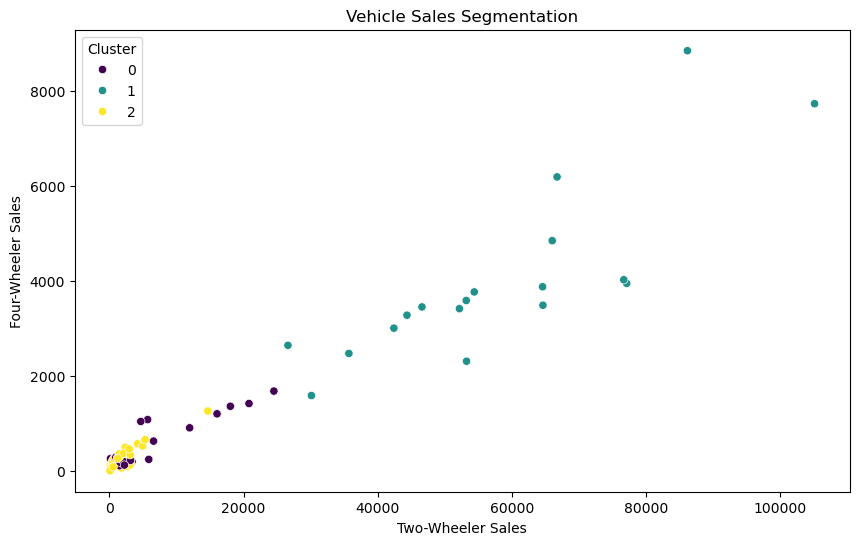

In [14]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='2 W', y='4 W', hue='Cluster', data=df, palette='viridis')
plt.title('Vehicle Sales Segmentation')
plt.xlabel('Two-Wheeler Sales')
plt.ylabel('Four-Wheeler Sales')
plt.show()

In [15]:
# Summary statistics for each cluster
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

                       YEAR           2 W           3 W          4 W  \
Cluster                                                                
0       2020-02-07 18:00:00   6758.650000  12083.800000   587.550000   
1       2022-08-16 08:00:00  58118.444444  31800.333333  4028.333333   
2       2019-03-25 02:40:00   2004.472222   7914.388889   275.250000   

                BUS         TOTAL  
Cluster                            
0        104.400000  19534.400000  
1        181.055556  94128.166667  
2         20.666667  10214.777778  


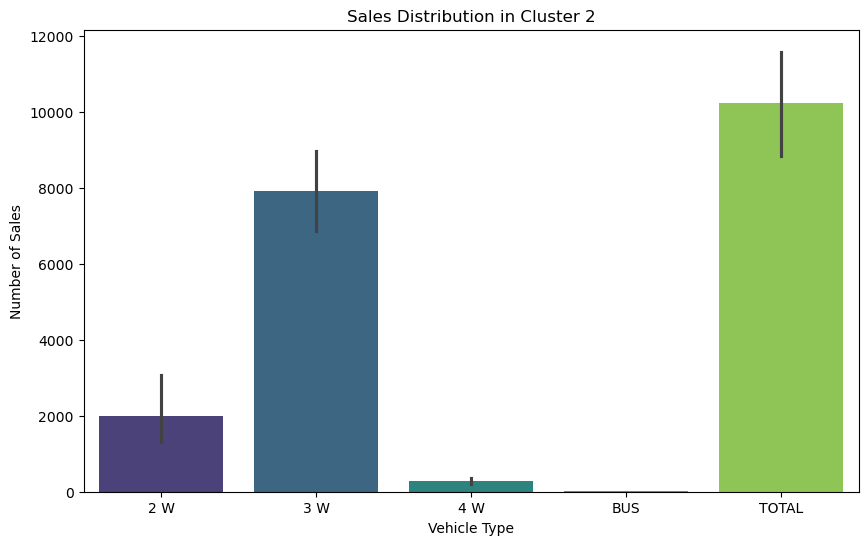

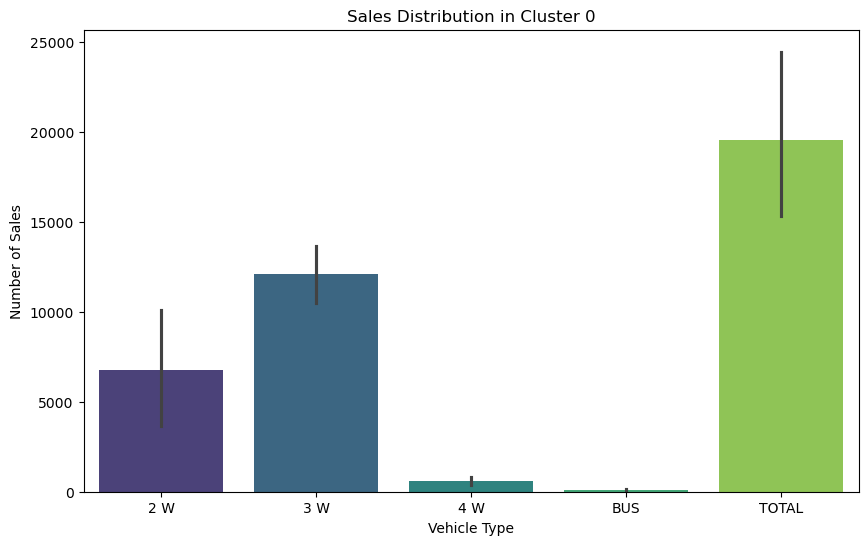

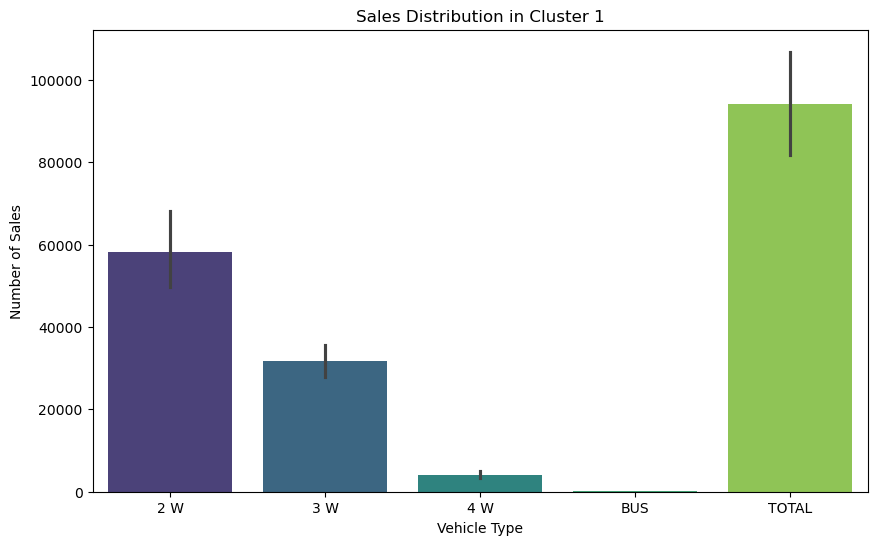

In [16]:
# Plot the distribution of sales for each cluster
for cluster in df['Cluster'].unique():
    plt.figure(figsize=(10, 6))
    cluster_data = df[df['Cluster'] == cluster]
    sns.barplot(data=cluster_data.drop(columns=['Cluster']), palette='viridis')
    plt.title(f'Sales Distribution in Cluster {cluster}')
    plt.xlabel('Vehicle Type')
    plt.ylabel('Number of Sales')
    plt.show()


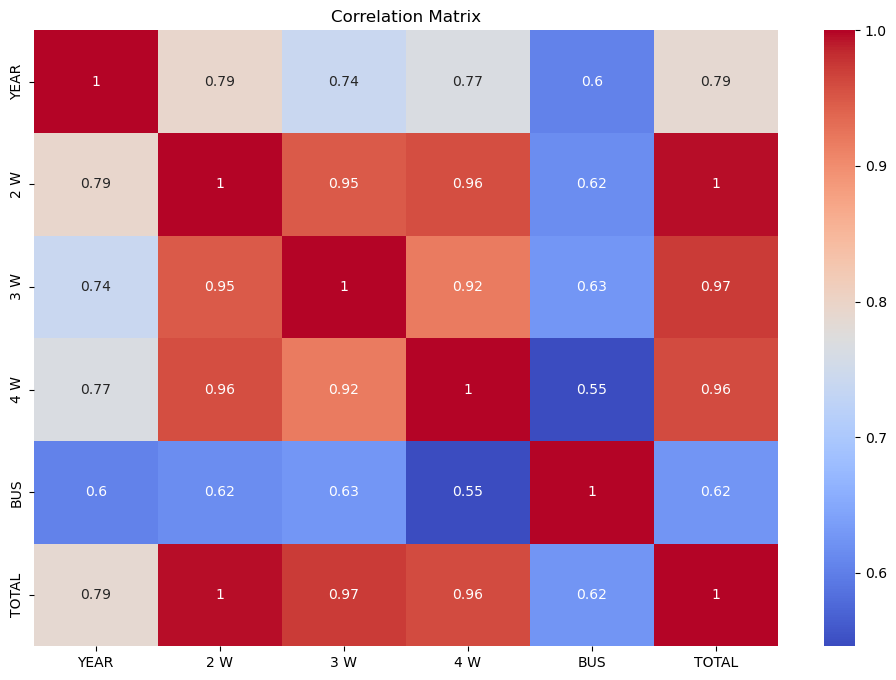

In [17]:
# Analyzing correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df.drop(columns=['Cluster']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [18]:
!pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB 960.0 kB/s eta 0:00:14
   ---------------------------------------- 0.0/13.3 MB 960.0 kB/s eta 0:00:14
   ---------------------------------------- 0.1/13.3 MB 544.7 kB/s eta 0:00:25
   ---------------------------------------- 0.1/13.3 MB 847.9 kB/s eta 0:00:16
    --------------------------------------- 0.2/13.3 MB 903.5 kB/s eta 0:00:15
    --------------------------------------- 0.2/13.3 MB 915.1 kB/s eta 0:00:15
    --------------------------------------- 0.3/13.3 MB 999.9 kB/s eta 0:00:14
   - -------------------------------------- 0.4/13.3 MB 1.1 MB/s eta 0:00:13
   - -------------------------------------- 0.4/13.3 MB 1.1 MB/s eta 0:00:12
   - -------------------------------------- 0.5/13.3 MB 1.1 MB/s eta 0:00:12
   - -------------------------------------- 0.6/13.3 MB 1.2 MB/s eta 0:00:11
   - -------------------------------------- 0.7/13.3 MB 1.3 MB/s eta 

In [19]:
from prophet import Prophet

20:52:58 - cmdstanpy - INFO - Chain [1] start processing
20:52:58 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Jayakrishnan\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
20:52:58 - cmdstanpy - INFO - Chain [1] start processing
20:52:59 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Jayakrishnan\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
20:52:59 - cmdstanpy - INFO - Chain [1] start processing
20:52:59 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Jayakrishnan\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
20:52:59 - cmdstanpy - INFO - Chain [1] start processin

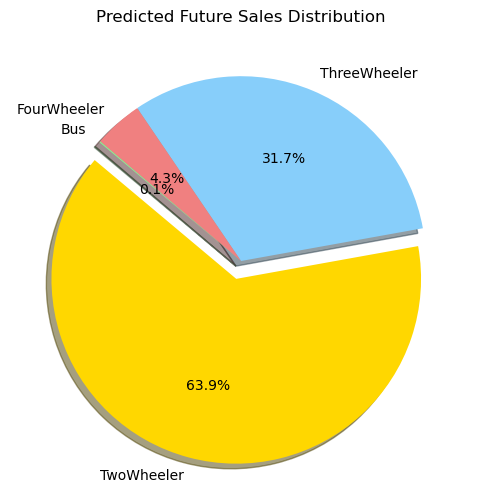

In [25]:
# Load the dataset
df2 = pd.read_excel(path)

# Assume the dataset has columns: 'Month', 'TwoWheeler', 'ThreeWheeler', 'FourWheeler'
# Convert 'Month' to datetime format
df2['YEAR'] = pd.to_datetime(df2['YEAR'])

# Define a function to fit Prophet model and make future predictions
def predict_sales(df, column, periods=12):
    data = df[['YEAR', column]].rename(columns={'YEAR': 'ds', column: 'y'})
    model = Prophet()
    model.fit(data)
    future = model.make_future_dataframe(periods=periods, freq='M')
    forecast = model.predict(future)
    return forecast[['ds', 'yhat']]

# Predict future sales for each category
two_wheeler_forecast = predict_sales(df2, '2 W')
three_wheeler_forecast = predict_sales(df2, '3 W')
four_wheeler_forecast = predict_sales(df2, '4 W')
bus_forecast = predict_sales(df2, 'BUS')

# Sum the predicted sales for the future period
total_future_sales = {
    'TwoWheeler': two_wheeler_forecast['yhat'].iloc[-12:].sum(),
    'ThreeWheeler': three_wheeler_forecast['yhat'].iloc[-12:].sum(),
    'FourWheeler': four_wheeler_forecast['yhat'].iloc[-12:].sum(),
    'Bus': bus_forecast['yhat'].iloc[-12:].sum()
}

# Create a pie chart for the predicted future sales
labels = total_future_sales.keys()
sizes = total_future_sales.values()
colors = ['gold', 'lightskyblue', 'lightcoral', 'lightgreen']
explode = (0.1, 0, 0, 0)  # explode the 1st slice (TwoWheeler)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Predicted Future Sales Distribution')
plt.show()
